In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
#plt.style.use('fivethirtyeight')

In [292]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [293]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[6,3]
plt.rcParams['figure.dpi']=80

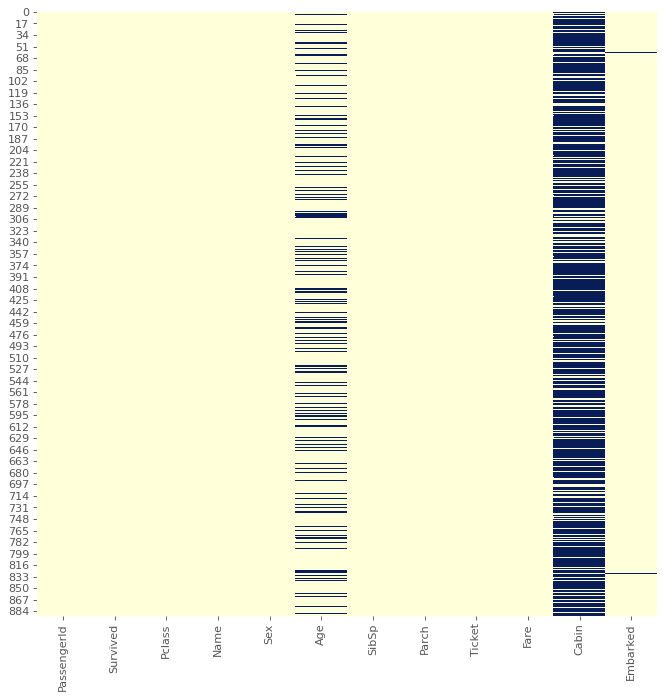

In [294]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

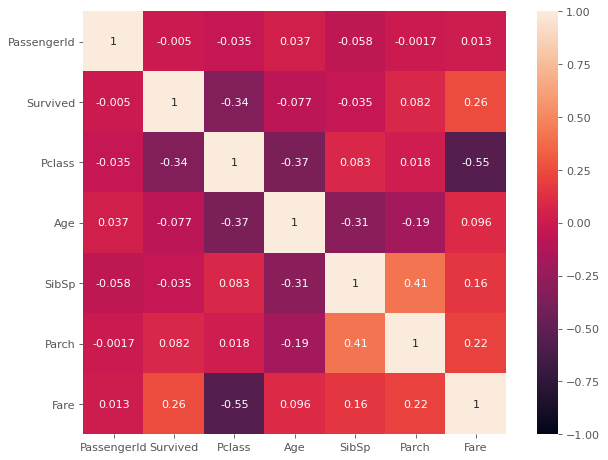

In [295]:
corrmat = data.corr()
fig = plt.figure(figsize = (10,7))
sns.heatmap(corrmat,vmax = 1,square = True,annot = True,vmin = -1)
plt.show()

In [296]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [297]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [298]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'
titles = sorted(set([x for x in data.Name.map(lambda x: get_title(x))]))
data['Title'] = data['Name'].map(lambda x: get_title(x))
del data['Name']

In [299]:
def replace_titles(x):
    title = x['Title']
    if title in ['Col', 'Don', 'Jonkheer', 'Major']:
        return 'Mr'
    elif title in ['Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    else:
        return title
data['Title'] = data.apply(replace_titles, axis=1)

In [300]:
cat_cols=['Survived','Pclass','Sex','Embarked','Parch','SibSp','Title']

In [301]:
data.sample(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
105,106,0,3,male,28.0,0,0,349207,7.8958,NaN,S,Mr
205,206,0,3,female,2.0,0,1,347054,10.4625,G6,S,Miss
748,749,0,1,male,19.0,1,0,113773,53.1000,D30,S,Mr
335,336,0,3,male,NaN,0,0,349225,7.8958,NaN,S,Mr
869,870,1,3,male,4.0,1,1,347742,11.1333,NaN,S,Master
119,120,0,3,female,2.0,4,2,347082,31.2750,NaN,S,Miss
22,23,1,3,female,15.0,0,0,330923,8.0292,NaN,Q,Miss
612,613,1,3,female,NaN,1,0,367230,15.5000,NaN,Q,Miss
39,40,1,3,female,14.0,1,0,2651,11.2417,NaN,C,Miss
162,163,0,3,male,26.0,0,0,347068,7.7750,NaN,S,Mr


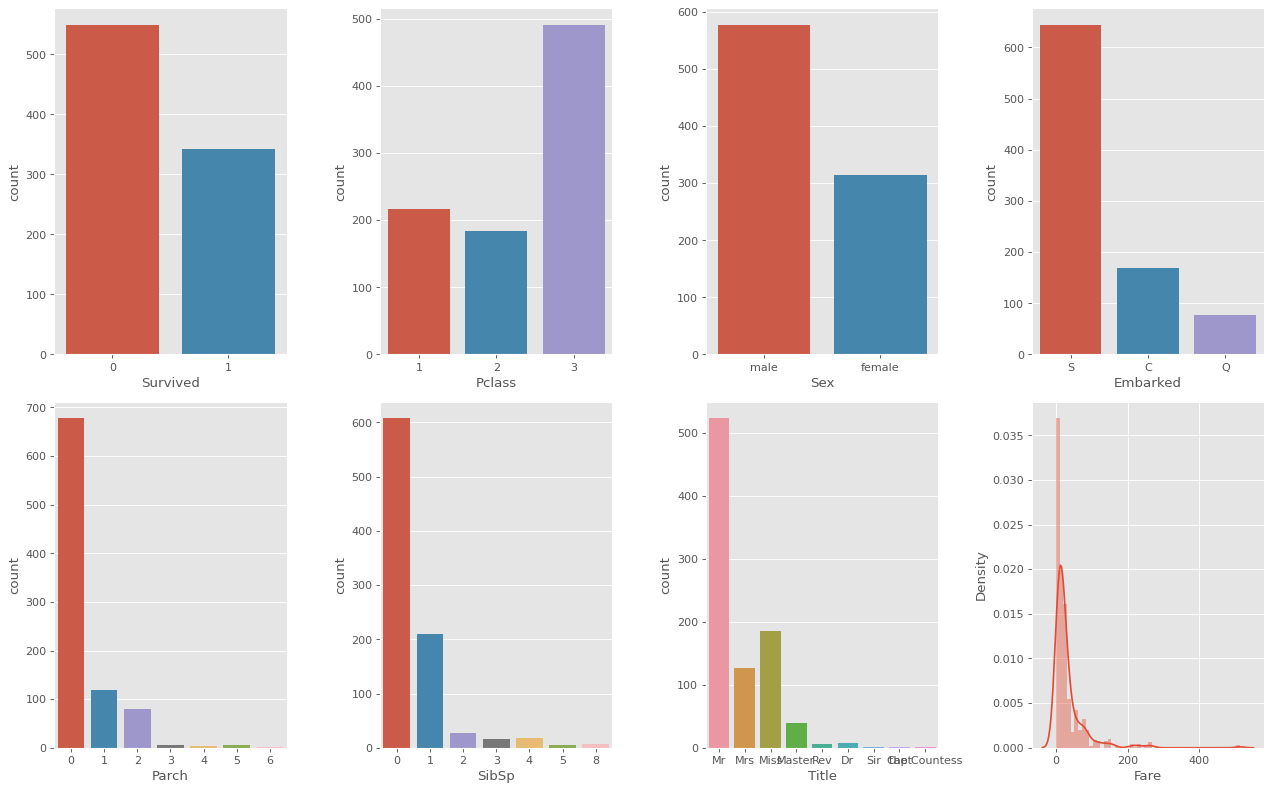

In [302]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
ax = ax.ravel()
for i, col in enumerate(cat_cols):
    sns.countplot(col,data=data,ax=ax[i])

sns.distplot(data['Fare'],kde=True,ax=ax[7])
plt.tight_layout()

Выводы
1. Большинство погибло
2. В основном пассажирами были люди с билетами третьего класса
3. В основном пассажирами были мужчины
4. Большинство было embarked как S
5. 
6. В основном путешествовали без детей
7. Большинство совершенно точно было замужем
8. В основном у людей билет был недорогой

Имеет смысл построить график корреляции этих признаков с survived

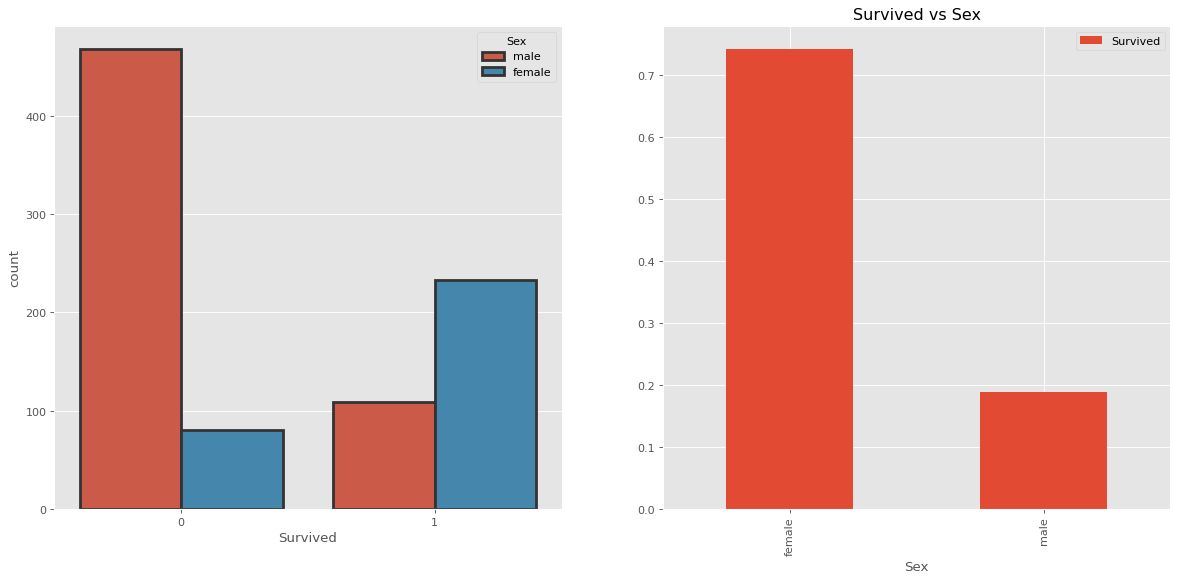

In [303]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Survived',hue='Sex',linewidth=2.5,edgecolor=".2",data=data, ax=ax[0])
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Survived vs Sex')
plt.show()

The majority of women survived, compared with men

<AxesSubplot:xlabel='Survived', ylabel='Age'>

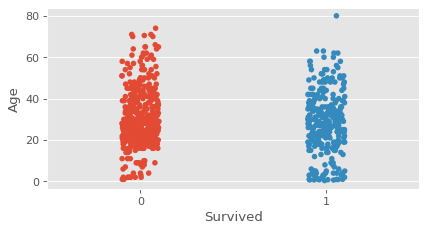

In [304]:
sns.stripplot(x="Survived", y="Age", data=data,jitter=True)


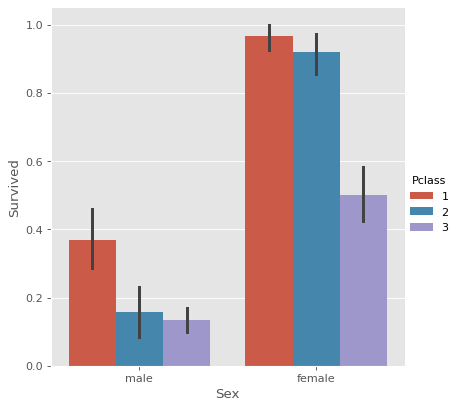

In [305]:
sns.catplot(x='Sex',y='Survived',kind='bar',data=data,hue='Pclass')

In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


В основном погибли пассажиры 3-го класс, чем выше класс тем больше шанс спасения. У женщин из первого и второго класса была примерно одинаковая вероятность выживания, 

In [307]:
class1=data[data['Pclass']==1]['Age'].mean();
class2=data[data['Pclass']==2]['Age'].mean();
class3=data[data['Pclass']==3]['Age'].mean();
print("{} {} {}".format(class1, class2, class3))

38.233440860215055 29.87763005780347 25.14061971830986


In [308]:
data.loc[data.Pclass==1, 'Age']=data.loc[data.Pclass==1, 'Age'].fillna(class1)
data.loc[data.Pclass==2, 'Age']=data.loc[data.Pclass==2, 'Age'].fillna(class2)
data.loc[data.Pclass==3, 'Age']=data.loc[data.Pclass==3, 'Age'].fillna(class3)
data.sample(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
344,345,0,2,male,36.00000,0,0,229236,13.0000,NaN,S,Mr
153,154,0,3,male,40.50000,0,2,A/5. 851,14.5000,NaN,S,Mr
211,212,1,2,female,35.00000,0,0,F.C.C. 13528,21.0000,NaN,S,Miss
223,224,0,3,male,25.14062,0,0,349234,7.8958,NaN,S,Mr
114,115,0,3,female,17.00000,0,0,2627,14.4583,NaN,C,Miss
294,295,0,3,male,24.00000,0,0,349233,7.8958,NaN,S,Mr
743,744,0,3,male,24.00000,1,0,376566,16.1000,NaN,S,Mr
411,412,0,3,male,25.14062,0,0,394140,6.8583,NaN,Q,Mr
542,543,0,3,female,11.00000,4,2,347082,31.2750,NaN,S,Miss
99,100,0,2,male,34.00000,1,0,244367,26.0000,NaN,S,Mr


In [309]:
del data['Ticket']
del data['Cabin']

In [310]:
data['Family']=data['Parch']+data['SibSp']

In [311]:
del data['Parch']
del data['SibSp']

In [267]:
y=data['Survived']
del data['Survived']

In [268]:
del data['PassengerId']

In [269]:
data.sample(20)

,Pclass,Sex,Age,Fare,Embarked,Title,Family
889,1,male,26.00000,30.0000,C,Mr,0
492,1,male,55.00000,30.5000,S,Mr,0
118,1,male,24.00000,247.5208,C,Mr,1
496,1,female,54.00000,78.2667,C,Miss,1
187,1,male,45.00000,26.5500,S,Mr,0
600,2,female,24.00000,27.0000,S,Mrs,3
35,1,male,42.00000,52.0000,S,Mr,1
685,2,male,25.00000,41.5792,C,Mr,3
262,1,male,52.00000,79.6500,S,Mr,2
554,3,female,22.00000,7.7750,S,Miss,0


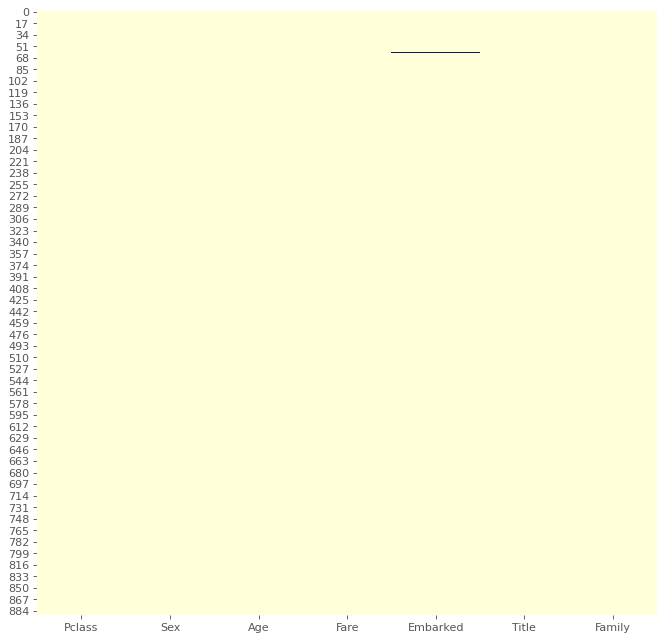

In [270]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

In [271]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr', 'Sir', 'Capt',
       'the Countess'], dtype=object)

In [285]:
cat_cols=['Pclass','Sex', 'Family']
num_cols=['Age','Fare','Embarked']
feature_cols=cat_cols+num_cols

In [286]:
data['Embarked']=data['Embarked'].fillna("Nan")
data[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pclass  891 non-null    int64 
 1   Sex     891 non-null    object
 2   Family  891 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 21.0+ KB


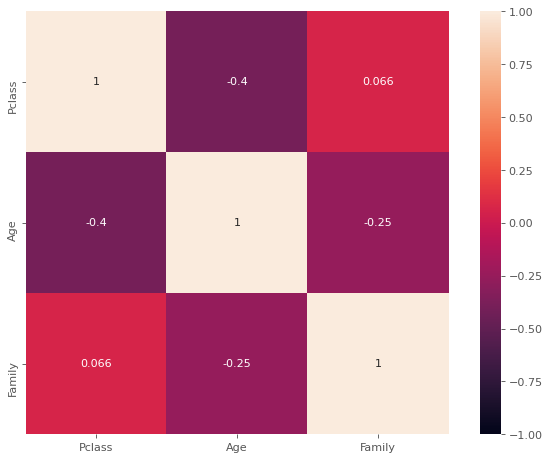

In [287]:
corrmat = data.corr()
fig = plt.figure(figsize = (10,7))
sns.heatmap(corrmat,vmax = 1,square = True,annot = True,vmin = -1)
plt.show()

In [289]:
data

,Pclass,Sex,Age,Embarked,Title,Family
0,3,male,22.00000,S,Mr,1
1,1,female,38.00000,C,Mrs,1
2,3,female,26.00000,S,Miss,0
3,1,female,35.00000,S,Mrs,1
4,3,male,35.00000,S,Mr,0
...,...,...,...,...,...,...
886,2,male,27.00000,S,Rev,0
887,1,female,19.00000,S,Miss,0
888,3,female,25.14062,S,Miss,3
889,1,male,26.00000,C,Mr,0


In [290]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

In [291]:
X=data[feature_cols]
X

KeyError: "['Fare'] not in index"

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40)
cat_default = cb.CatBoostClassifier(cat_features=cat_cols, n_estimators=400, eval_metric='F1')
cat_default.fit(X_train, y_train)

Learning rate set to 0.01826
0:	learn: 0.7168831	total: 1.36ms	remaining: 542ms
1:	learn: 0.7244094	total: 2.69ms	remaining: 535ms
2:	learn: 0.7244094	total: 6.88ms	remaining: 911ms
3:	learn: 0.7399464	total: 10.6ms	remaining: 1.05s
4:	learn: 0.7533156	total: 15.5ms	remaining: 1.22s
5:	learn: 0.7399464	total: 18.7ms	remaining: 1.23s
6:	learn: 0.7399464	total: 21.4ms	remaining: 1.2s
7:	learn: 0.7399464	total: 24.5ms	remaining: 1.2s
8:	learn: 0.7340426	total: 27.4ms	remaining: 1.19s
9:	learn: 0.7320955	total: 28.8ms	remaining: 1.12s
10:	learn: 0.7399464	total: 32.9ms	remaining: 1.16s
11:	learn: 0.7379679	total: 34.9ms	remaining: 1.13s
12:	learn: 0.7513228	total: 36.5ms	remaining: 1.08s
13:	learn: 0.7446809	total: 38.1ms	remaining: 1.05s
14:	learn: 0.7379679	total: 39.3ms	remaining: 1.01s
15:	learn: 0.7520000	total: 41.4ms	remaining: 994ms
16:	learn: 0.7560322	total: 43.5ms	remaining: 980ms
17:	learn: 0.7593583	total: 45.7ms	remaining: 969ms
18:	learn: 0.7593583	total: 46.6ms	remaining: 9

246:	learn: 0.7870620	total: 358ms	remaining: 222ms
247:	learn: 0.7849462	total: 360ms	remaining: 221ms
248:	learn: 0.7849462	total: 361ms	remaining: 219ms
249:	learn: 0.7849462	total: 362ms	remaining: 217ms
250:	learn: 0.7849462	total: 363ms	remaining: 215ms
251:	learn: 0.7849462	total: 364ms	remaining: 214ms
252:	learn: 0.7849462	total: 366ms	remaining: 212ms
253:	learn: 0.7849462	total: 367ms	remaining: 211ms
254:	learn: 0.7849462	total: 368ms	remaining: 209ms
255:	learn: 0.7849462	total: 370ms	remaining: 208ms
256:	learn: 0.7849462	total: 371ms	remaining: 206ms
257:	learn: 0.7849462	total: 373ms	remaining: 205ms
258:	learn: 0.7882038	total: 375ms	remaining: 204ms
259:	learn: 0.7870620	total: 378ms	remaining: 204ms
260:	learn: 0.7870620	total: 380ms	remaining: 202ms
261:	learn: 0.7870620	total: 382ms	remaining: 201ms
262:	learn: 0.7870620	total: 385ms	remaining: 201ms
263:	learn: 0.7870620	total: 386ms	remaining: 199ms
264:	learn: 0.7891892	total: 387ms	remaining: 197ms
265:	learn: 

In [235]:
y_pred = cat_default.predict_proba(X_test)[:,1]
train = roc_auc_score(y_train, cat_default.predict_proba(X_train)[:,1])
test = roc_auc_score(y_test, y_pred)

# score
print('ROC-AUC для обучающей выборки: ', train)
print('ROC-AUC для тестовой выборки: ',  test)

ROC-AUC для обучающей выборки:  0.9058511272814029
ROC-AUC для тестовой выборки:  0.8693877551020408


In [167]:
model_cat = cb.CatBoostClassifier(cat_features=cat_cols, eval_metric='F1')
grid = {'learning_rate': [0.03, 0.001, 0.01, 0.1],
        'depth': [4, 6, 8, 10],
        'n_estimators':[50,100,200,300],
        'l2_leaf_reg': [1, 3, 4, 10],
}
grid_search_result = model_cat.grid_search(grid, X=X_train, y=y_train, plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.7073170732
bestIteration = 14

0:	loss: 0.7073171	best: 0.7073171 (0)	total: 181ms	remaining: 46.1s

bestTest = 0.7073170732
bestIteration = 23

1:	loss: 0.7073171	best: 0.7073171 (0)	total: 259ms	remaining: 32.9s

bestTest = 0.7073170732
bestIteration = 24

2:	loss: 0.7073171	best: 0.7073171 (0)	total: 324ms	remaining: 27.4s

bestTest = 0.7088607595
bestIteration = 38

3:	loss: 0.7088608	best: 0.7088608 (3)	total: 394ms	remaining: 24.8s

bestTest = 0.7
bestIteration = 10

4:	loss: 0.7000000	best: 0.7088608 (3)	total: 460ms	remaining: 23.1s

bestTest = 0.7073170732
bestIteration = 13

5:	loss: 0.7073171	best: 0.7088608 (3)	total: 524ms	remaining: 21.8s

bestTest = 0.7073170732
bestIteration = 13

6:	loss: 0.7073171	best: 0.7088608 (3)	total: 598ms	remaining: 21.3s

bestTest = 0.7088607595
bestIteration = 46

7:	loss: 0.7088608	best: 0.7088608 (3)	total: 676ms	remaining: 20.9s

bestTest = 0.7088607595
bestIteration = 35

8:	loss: 0.7088608	best: 0.7088608 (3)	total: 748ms	


bestTest = 0.7160493827
bestIteration = 24

72:	loss: 0.7160494	best: 0.7200000 (51)	total: 15.9s	remaining: 39.9s

bestTest = 0.7
bestIteration = 40

73:	loss: 0.7000000	best: 0.7200000 (51)	total: 16s	remaining: 39.3s

bestTest = 0.7160493827
bestIteration = 40

74:	loss: 0.7160494	best: 0.7200000 (51)	total: 16.1s	remaining: 38.8s

bestTest = 0.7179487179
bestIteration = 41

75:	loss: 0.7179487	best: 0.7200000 (51)	total: 16.2s	remaining: 38.3s

bestTest = 0.7
bestIteration = 18

76:	loss: 0.7000000	best: 0.7200000 (51)	total: 16.2s	remaining: 37.8s

bestTest = 0.6835443038
bestIteration = 11

77:	loss: 0.6835443	best: 0.7200000 (51)	total: 16.3s	remaining: 37.2s

bestTest = 0.6913580247
bestIteration = 24

78:	loss: 0.6913580	best: 0.7200000 (51)	total: 16.4s	remaining: 36.7s

bestTest = 0.7088607595
bestIteration = 39

79:	loss: 0.7088608	best: 0.7200000 (51)	total: 16.5s	remaining: 36.2s

bestTest = 0.7160493827
bestIteration = 25

80:	loss: 0.7160494	best: 0.7200000 (51)	total:


bestTest = 0.7160493827
bestIteration = 18

144:	loss: 0.7160494	best: 0.7272727 (124)	total: 36.9s	remaining: 28.3s

bestTest = 0.7160493827
bestIteration = 69

145:	loss: 0.7160494	best: 0.7272727 (124)	total: 37.1s	remaining: 27.9s

bestTest = 0.725
bestIteration = 36

146:	loss: 0.7250000	best: 0.7272727 (124)	total: 37.3s	remaining: 27.7s

bestTest = 0.7272727273
bestIteration = 54

147:	loss: 0.7272727	best: 0.7272727 (124)	total: 37.6s	remaining: 27.4s

bestTest = 0.7179487179
bestIteration = 51

148:	loss: 0.7179487	best: 0.7272727 (124)	total: 37.9s	remaining: 27.2s

bestTest = 0.6923076923
bestIteration = 2

149:	loss: 0.6923077	best: 0.7272727 (124)	total: 38s	remaining: 26.9s

bestTest = 0.7179487179
bestIteration = 79

150:	loss: 0.7179487	best: 0.7272727 (124)	total: 38.2s	remaining: 26.6s

bestTest = 0.7088607595
bestIteration = 17

151:	loss: 0.7088608	best: 0.7272727 (124)	total: 38.4s	remaining: 26.3s

bestTest = 0.7179487179
bestIteration = 70

152:	loss: 0.7179487	


bestTest = 0.72
bestIteration = 66

215:	loss: 0.7200000	best: 0.7368421 (160)	total: 1m 21s	remaining: 15s

bestTest = 0.7179487179
bestIteration = 42

216:	loss: 0.7179487	best: 0.7368421 (160)	total: 1m 21s	remaining: 14.6s

bestTest = 0.7160493827
bestIteration = 88

217:	loss: 0.7160494	best: 0.7368421 (160)	total: 1m 21s	remaining: 14.2s

bestTest = 0.7
bestIteration = 41

218:	loss: 0.7000000	best: 0.7368421 (160)	total: 1m 21s	remaining: 13.8s

bestTest = 0.7272727273
bestIteration = 40

219:	loss: 0.7272727	best: 0.7368421 (160)	total: 1m 22s	remaining: 13.4s

bestTest = 0.7179487179
bestIteration = 59

220:	loss: 0.7179487	best: 0.7368421 (160)	total: 1m 22s	remaining: 13s

bestTest = 0.7073170732
bestIteration = 72

221:	loss: 0.7073171	best: 0.7368421 (160)	total: 1m 22s	remaining: 12.6s

bestTest = 0.7160493827
bestIteration = 16

222:	loss: 0.7160494	best: 0.7368421 (160)	total: 1m 22s	remaining: 12.2s

bestTest = 0.7297297297
bestIteration = 88

223:	loss: 0.7297297	bes

In [172]:
best_model=cb.CatBoostClassifier(cat_features=cat_cols, eval_metric='F1', depth=6, learning_rate=0.01, n_estimators=500, l2_leaf_reg=1)
best_model.fit(X_train, y_train)

0:	learn: 0.7500000	total: 4.49ms	remaining: 2.24s
1:	learn: 0.7607053	total: 8.65ms	remaining: 2.15s
2:	learn: 0.7602041	total: 12.8ms	remaining: 2.11s
3:	learn: 0.7602041	total: 26.1ms	remaining: 3.24s
4:	learn: 0.7595628	total: 30.2ms	remaining: 2.99s
5:	learn: 0.7520436	total: 34ms	remaining: 2.79s
6:	learn: 0.7567568	total: 35.7ms	remaining: 2.51s
7:	learn: 0.7493261	total: 37.9ms	remaining: 2.33s
8:	learn: 0.7486911	total: 42.1ms	remaining: 2.29s
9:	learn: 0.7399464	total: 44.6ms	remaining: 2.19s
10:	learn: 0.7356948	total: 66.5ms	remaining: 2.96s
11:	learn: 0.7391304	total: 69.6ms	remaining: 2.83s
12:	learn: 0.7411444	total: 73ms	remaining: 2.73s
13:	learn: 0.7391304	total: 84.6ms	remaining: 2.94s
14:	learn: 0.7377049	total: 89.7ms	remaining: 2.9s
15:	learn: 0.7425474	total: 91.9ms	remaining: 2.78s
16:	learn: 0.7425474	total: 93.8ms	remaining: 2.66s
17:	learn: 0.7439353	total: 97.8ms	remaining: 2.62s
18:	learn: 0.7439353	total: 100ms	remaining: 2.54s
19:	learn: 0.7439353	total: 

200:	learn: 0.7844156	total: 562ms	remaining: 836ms
201:	learn: 0.7844156	total: 565ms	remaining: 833ms
202:	learn: 0.7844156	total: 566ms	remaining: 828ms
203:	learn: 0.7864583	total: 570ms	remaining: 827ms
204:	learn: 0.7864583	total: 571ms	remaining: 822ms
205:	learn: 0.7864583	total: 574ms	remaining: 818ms
206:	learn: 0.7864583	total: 578ms	remaining: 819ms
207:	learn: 0.7864583	total: 583ms	remaining: 818ms
208:	learn: 0.7864583	total: 585ms	remaining: 815ms
209:	learn: 0.7864583	total: 593ms	remaining: 819ms
210:	learn: 0.7864583	total: 595ms	remaining: 814ms
211:	learn: 0.7864583	total: 597ms	remaining: 811ms
212:	learn: 0.7864583	total: 599ms	remaining: 807ms
213:	learn: 0.7864583	total: 600ms	remaining: 801ms
214:	learn: 0.7864583	total: 601ms	remaining: 797ms
215:	learn: 0.7885117	total: 603ms	remaining: 793ms
216:	learn: 0.7885117	total: 604ms	remaining: 787ms
217:	learn: 0.7885117	total: 605ms	remaining: 782ms
218:	learn: 0.7885117	total: 609ms	remaining: 781ms
219:	learn: 

368:	learn: 0.7937337	total: 936ms	remaining: 332ms
369:	learn: 0.7937337	total: 937ms	remaining: 329ms
370:	learn: 0.7937337	total: 940ms	remaining: 327ms
371:	learn: 0.7937337	total: 943ms	remaining: 325ms
372:	learn: 0.7937337	total: 945ms	remaining: 322ms
373:	learn: 0.7937337	total: 946ms	remaining: 319ms
374:	learn: 0.7937337	total: 948ms	remaining: 316ms
375:	learn: 0.7937337	total: 950ms	remaining: 313ms
376:	learn: 0.7937337	total: 952ms	remaining: 311ms
377:	learn: 0.7937337	total: 954ms	remaining: 308ms
378:	learn: 0.7937337	total: 955ms	remaining: 305ms
379:	learn: 0.7937337	total: 957ms	remaining: 302ms
380:	learn: 0.7937337	total: 958ms	remaining: 299ms
381:	learn: 0.7937337	total: 960ms	remaining: 297ms
382:	learn: 0.7937337	total: 962ms	remaining: 294ms
383:	learn: 0.7937337	total: 964ms	remaining: 291ms
384:	learn: 0.7937337	total: 967ms	remaining: 289ms
385:	learn: 0.7937337	total: 969ms	remaining: 286ms
386:	learn: 0.7937337	total: 972ms	remaining: 284ms
387:	learn: 

In [173]:
y_pred = best_model.predict_proba(X_test)[:,1]
train = roc_auc_score(y_train, best_model.predict_proba(X_train)[:,1])
test = roc_auc_score(y_test, y_pred)

# score
print('ROC-AUC для обучающей выборки: ', train)
print('ROC-AUC для тестовой выборки: ',  test)

ROC-AUC для обучающей выборки:  0.8887214651758677
ROC-AUC для тестовой выборки:  0.8843022057307771


Прогноз:

In [236]:
submission = pd.read_csv('test.csv')
submission['Family']=submission['Parch']+submission['SibSp']
submission.loc[data.Pclass==1, 'Age']=submission.loc[data.Pclass==1, 'Age'].fillna(class1)
submission.loc[data.Pclass==2, 'Age']=submission.loc[data.Pclass==2, 'Age'].fillna(class2)
submission.loc[data.Pclass==3, 'Age']=submission.loc[data.Pclass==3, 'Age'].fillna(class3)

In [237]:
del submission['Parch']
del submission['SibSp']
del submission['Ticket']

In [238]:
submission['Embarked']=submission['Embarked'].fillna("Nan")
submission

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.50000,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00000,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.87763,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,29.87763,8.0500,NaN,S,0


In [239]:
titles = sorted(set([x for x in submission.Name.map(lambda x: get_title(x))]))
submission['Title'] = submission['Name'].map(lambda x: get_title(x))
del submission['Name']

In [240]:
submission['Title'] = submission.apply(replace_titles, axis=1)
submission['Cabin']=submission['Cabin'].fillna("Nan")
submission['Deck']=submission['Cabin'].str.slice(0,1)
del submission['Cabin']

In [241]:
X=submission[feature_cols]
X

,Pclass,Sex,Family,Age
0,3,male,0,34.50000
1,3,female,1,47.00000
2,2,male,0,62.00000
3,3,male,0,27.00000
4,3,female,2,22.00000
...,...,...,...,...
413,3,male,0,29.87763
414,1,female,0,39.00000
415,3,male,0,38.50000
416,3,male,0,29.87763


In [242]:
y_pred=cat_default.predict(X)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [243]:
final={'PassengerId': submission['PassengerId'], 'Survived': y_pred}
final = pd.DataFrame(data=final)
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [244]:
final.to_csv('final.csv', index=False)

Результат kaggle: 0.78468

In [316]:
!pip install xgboost

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [317]:
import xgboost.XGBClassifier

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [318]:
!brew install libomp

Updating Homebrew...
To restore the stashed changes to /usr/local/Homebrew run:
  'cd /usr/local/Homebrew && git stash pop'
==> Homebrew has enabled anonymous aggregate formula and cask analytics.
Read the analytics documentation (and how to opt-out) here:
  https://docs.brew.sh/Analytics
No analytics have been recorded yet (or will be during this `brew` run).

==> Tapping homebrew/core
Cloning into '/usr/local/Homebrew/Library/Taps/homebrew/homebrew-core'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 821054 (delta 61), reused 72 (delta 47), pack-reused 820951
Receiving objects: 100% (821054/821054), 324.15 MiB | 1.45 MiB/s, done.
Resolving deltas: 100% (552303/552303), done.
Updating files: 100% (5601/5601), done.
Tapped 2 commands and 5341 formulae (5,626 files, 355.9MB).
Error: The following directories are not writable by your user:
/usr/local/share/info
/usr/local/share/man